This notebook will query/join Gaia and SDSS to get u,g,r,i,z photometry for bright stars. We'll put the query part in this notebook and develop another notebook to make the plots. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from astroquery.gaia import Gaia 


Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [3]:
tables = Gaia.load_tables(only_names=True)

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]


In [4]:
for table in tables:
    print(table.get_qualified_name())

external.external.apassdr9
external.external.gaiadr2_geometric_distance
external.external.galex_ais
external.external.ravedr5_com
external.external.ravedr5_dr5
external.external.ravedr5_gra
external.external.ravedr5_on
external.external.sdssdr13_photoprimary
external.external.skymapperdr1_master
external.external.skymapperdr2_master
external.external.tmass_xsc
public.public.hipparcos
public.public.hipparcos_newreduction
public.public.hubble_sc
public.public.igsl_source
public.public.igsl_source_catalog_ids
public.public.tycho2
public.public.dual
tap_config.tap_config.coord_sys
tap_config.tap_config.properties
tap_schema.tap_schema.columns
tap_schema.tap_schema.key_columns
tap_schema.tap_schema.keys
tap_schema.tap_schema.schemas
tap_schema.tap_schema.tables
gaiaedr3.gaiaedr3.gaia_source
gaiaedr3.gaiaedr3.agn_cross_id
gaiaedr3.gaiaedr3.commanded_scan_law
gaiaedr3.gaiaedr3.dr2_neighbourhood
gaiaedr3.gaiaedr3.frame_rotator_source
gaiaedr3.gaiaedr3.hipparcos2_best_neighbour
gaiaedr3.gaiaedr

In [5]:
meta=Gaia.load_table('gaiaedr3.gaia_source') 

Retrieving table 'gaiaedr3.gaia_source'
Parsing table 'gaiaedr3.gaia_source'...
Done.


In [6]:
print(meta)

TAP Table name: gaiaedr3.gaiaedr3.gaia_source
Description: This table has an entry for every Gaia observed source as listed in the
Main Database accumulating catalogue version from which the catalogue
release has been generated. It contains the basic source parameters,
that is only final data (no epoch data) and no spectra (neither final
nor epoch).
Num. columns: 99


In [7]:
for column in meta.columns:
    print(column.name)

solution_id
designation
source_id
random_index
ref_epoch
ra
ra_error
dec
dec_error
parallax
parallax_error
parallax_over_error
pm
pmra
pmra_error
pmdec
pmdec_error
ra_dec_corr
ra_parallax_corr
ra_pmra_corr
ra_pmdec_corr
dec_parallax_corr
dec_pmra_corr
dec_pmdec_corr
parallax_pmra_corr
parallax_pmdec_corr
pmra_pmdec_corr
astrometric_n_obs_al
astrometric_n_obs_ac
astrometric_n_good_obs_al
astrometric_n_bad_obs_al
astrometric_gof_al
astrometric_chi2_al
astrometric_excess_noise
astrometric_excess_noise_sig
astrometric_params_solved
astrometric_primary_flag
nu_eff_used_in_astrometry
pseudocolour
pseudocolour_error
ra_pseudocolour_corr
dec_pseudocolour_corr
parallax_pseudocolour_corr
pmra_pseudocolour_corr
pmdec_pseudocolour_corr
astrometric_matched_transits
visibility_periods_used
astrometric_sigma5d_max
matched_transits
new_matched_transits
matched_transits_removed
ipd_gof_harmonic_amplitude
ipd_gof_harmonic_phase
ipd_frac_multi_peak
ipd_frac_odd_win
ruwe
scan_direction_strength_k1
scan_di

In [8]:
meta2=Gaia.load_table('gaiaedr3.sdssdr13_best_neighbour')
for column in meta2.columns:
    print(column.name)

Retrieving table 'gaiaedr3.sdssdr13_best_neighbour'
Parsing table 'gaiaedr3.sdssdr13_best_neighbour'...
Done.
source_id
clean_sdssdr13_oid
original_ext_source_id
angular_distance
number_of_neighbours
number_of_mates
xm_flag


In [9]:
meta3=Gaia.load_table('external.sdssdr13_photoprimary')
for column in meta3.columns:
    print(column.name)

Retrieving table 'external.sdssdr13_photoprimary'
Parsing table 'external.sdssdr13_photoprimary'...
Done.
objid
skyversion
run
rerun
camcol
field
obj
mode
nchild
type
clean
probpsf
insidemask
flags
rowc
rowcerr
colc
colcerr
rowv
rowverr
colv
colverr
rowc_u
rowc_g
rowc_r
rowc_i
rowc_z
rowcerr_u
rowcerr_g
rowcerr_r
rowcerr_i
rowcerr_z
colc_u
colc_g
colc_r
colc_i
colc_z
colcerr_u
colcerr_g
colcerr_r
colcerr_i
colcerr_z
sky_u
sky_g
sky_r
sky_i
sky_z
skyivar_u
skyivar_g
skyivar_r
skyivar_i
skyivar_z
psfmag_u
psfmag_g
psfmag_r
psfmag_i
psfmag_z
psfmagerr_u
psfmagerr_g
psfmagerr_r
psfmagerr_i
psfmagerr_z
fibermag_u
fibermag_g
fibermag_r
fibermag_i
fibermag_z
fibermagerr_u
fibermagerr_g
fibermagerr_r
fibermagerr_i
fibermagerr_z
fiber2mag_u
fiber2mag_g
fiber2mag_r
fiber2mag_i
fiber2mag_z
fiber2magerr_u
fiber2magerr_g
fiber2magerr_r
fiber2magerr_i
fiber2magerr_z
petromag_u
petromag_g
petromag_r
petromag_i
petromag_z
petromagerr_u
petromagerr_g
petromagerr_r
petromagerr_i
petromagerr_z
psfflux_u


In [10]:
# set limits for query
min_parallax_ratio = 20
min_brightness = 11
how_many = 50000
#dec<0 is hardcoded right now. No ra limit but could add

In [11]:
query_sd_base="""select TOP {how_many}
  gaiaedr3.gaia_source.source_id,
  gaiaedr3.gaia_source.ra,
  gaiaedr3.gaia_source.dec,
  gaiaedr3.gaia_source.parallax,
  gaiaedr3.gaia_source.parallax_over_error,
  gaiaedr3.gaia_source.phot_g_mean_mag,
  gaiaedr3.gaia_source.bp_rp,
  gaiaedr3.gaia_source.l,
  gaiaedr3.gaia_source.b,
  sdss.psfmag_u,
  sdss.psfmag_g,
  sdss.psfmag_r,
  sdss.psfmag_i,
  sdss.psfmag_z
from gaiaedr3.gaia_source 
-- SDSS
join gaiaedr3.sdssdr13_best_neighbour
  on gaiaedr3.sdssdr13_best_neighbour.source_id=gaiaedr3.gaia_source.source_id
join external.sdssdr13_photoprimary as sdss
  on sdss.objid = gaiaedr3.sdssdr13_best_neighbour.original_ext_source_id
WHERE
 gaiaedr3.gaia_source.parallax_over_error > {min_error} and
 gaiaedr3.gaia_source.dec < 0 and
 gaiaedr3.gaia_source.phot_g_mean_mag > {min_brightness}
"""



In [12]:
query_sdss = query_sd_base.format(how_many=how_many,min_brightness=min_brightness,min_error=min_parallax_ratio)

In [13]:
print(query_sdss)

select TOP 50000
  gaiaedr3.gaia_source.source_id,
  gaiaedr3.gaia_source.ra,
  gaiaedr3.gaia_source.dec,
  gaiaedr3.gaia_source.parallax,
  gaiaedr3.gaia_source.parallax_over_error,
  gaiaedr3.gaia_source.phot_g_mean_mag,
  gaiaedr3.gaia_source.bp_rp,
  gaiaedr3.gaia_source.l,
  gaiaedr3.gaia_source.b,
  sdss.psfmag_u,
  sdss.psfmag_g,
  sdss.psfmag_r,
  sdss.psfmag_i,
  sdss.psfmag_z
from gaiaedr3.gaia_source 
-- SDSS
join gaiaedr3.sdssdr13_best_neighbour
  on gaiaedr3.sdssdr13_best_neighbour.source_id=gaiaedr3.gaia_source.source_id
join external.sdssdr13_photoprimary as sdss
  on sdss.objid = gaiaedr3.sdssdr13_best_neighbour.original_ext_source_id
WHERE
 gaiaedr3.gaia_source.parallax_over_error > 20 and
 gaiaedr3.gaia_source.dec < 0 and
 gaiaedr3.gaia_source.phot_g_mean_mag > 11



In [14]:
job  = Gaia.launch_job_async(query_sdss)


INFO: Query finished. [astroquery.utils.tap.core]


In [15]:
results=job.get_results()

In [16]:
results

source_id,ra,dec,parallax,parallax_over_error,phot_g_mean_mag,bp_rp,l,b,psfmag_u,psfmag_g,psfmag_r,psfmag_i,psfmag_z
,deg,deg,mas,,mag,mag,deg,deg,mag,mag,mag,mag,mag
int64,float64,float64,float64,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32
2527251395117323264,10.519780593282448,-4.976175816740428,0.7370854056559581,20.000017,15.227292,0.69368553,116.7696735753734,-67.73588088714652,16.49564,15.57428,15.24819,15.08331,15.11901
3040375261144507776,115.0089704468592,-10.500688308505614,0.48714949916953704,20.000065,14.749246,1.1341114,227.8761692270541,5.800838975577844,17.16281,15.41704,14.71707,14.46766,14.27166
4272322858328849536,279.27863056883166,-0.5481982978595297,1.5854916169962927,20.000065,16.959112,2.2771015,30.80909415937436,2.9360123499345656,21.44375,18.93933,17.25084,16.37815,15.74219
3062384803870463488,112.17210751458649,-0.6873186039646602,0.6480629723635686,20.00009,15.456643,0.9040232,217.82410162983325,7.9633040324299165,17.38025,15.92351,15.42516,15.26737,15.1846
4371913494833828224,266.3412592994911,-0.7149530419862612,0.724216422503873,20.000124,15.517196,1.3794241,24.579962090182278,14.31970055834716,18.15526,16.40991,15.50224,15.05362,14.88797
3202347819423779584,63.98408028956097,-6.374393802735024,3.3907395828222424,20.000143,18.245455,2.869442,199.4417468912811,-37.28314404550823,23.34902,20.5087,18.96868,17.49903,16.73373
3062891713088285056,123.65104066279324,-8.040622103797919,0.9243763479253361,20.00015,16.063435,1.227767,230.03065443813898,14.420230500503239,19.08055,16.8556,16.05503,15.67504,15.57761
4138636155783466240,260.9803428989634,-13.0529903964696,0.4509448379942598,20.00016,14.044386,1.8182821,10.861127649144152,12.71488732400112,18.57714,15.51506,14.07824,15.82344,13.11004


In [17]:
outname_base='LSST-Gaia-SDSS-{min_brightness}-{min_error}-{how_many}.fits'

In [18]:
outname=outname_base.format(min_brightness=min_brightness,min_error=min_parallax_ratio,how_many=how_many)

In [19]:
print(outname)

LSST-Gaia-SDSS-11-20-50000.fits


In [20]:
results.write(outname, overwrite=True)

That's it. The next notebook will read this file (or others!) and make the plots. 

But let's make one plot to check

Text(0, 0.5, 'dec (deg ICRS)')

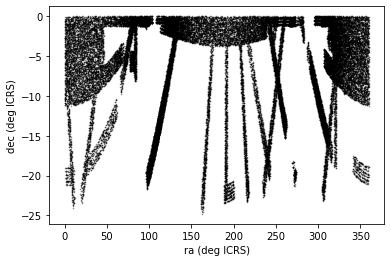

In [21]:
ra=results['ra']
dec=results['dec']

plt.plot(ra,dec, 'ko',alpha=0.5,markersize=0.5)
plt.xlabel('ra (deg ICRS)')
plt.ylabel('dec (deg ICRS)')

#SDSS distribution in southern sky is odd, but that's what happens when you let extragalactic astronomers design your survey. Just kidding, we love SDSS. :)